In [1]:
%matplotlib notebook 
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from scipy import integrate
import glob,sys

from mpl_toolkits.basemap import Basemap, shiftgrid

import MV2 as MV
import cdms2 as cdms
import genutil
import cdutil
import cdtime

sys.path.append("/Users/kmarvel/Google Drive/python-utils")
import Plotting


def bmap(X,projection="moll",**kwargs):
    """ quick plot of data on a lat,lon grid """
   # lon = X.getLongitude()[:]
    #lat = X.getLatitude()[:]
    
    lon = X.getLongitude().getBounds()[:,0]
    lat = X.getLatitude().getBounds()[:,0]
    vmin=None
    vmax=None
    if "vmin" in kwargs.keys():
        vmin=kwargs.pop("vmin")
    if "vmax" in kwargs.keys():
        vmax=kwargs.pop("vmax")
    if not ("lon_0" in list(kwargs.keys())):
        lon_0=np.median(lon)
    else:
        lon_0=kwargs.pop("lon_0")
        X,lon = shiftgrid(180,X,lon,start=False)
    m = Basemap(lon_0=lon_0,projection=projection,**kwargs)
    
        
    x,y=m(*np.meshgrid(lon,lat))
    #if vmin is None:
    #m.pcolormesh(x,y,X,**kwargs)
    #else:
    m.pcolor(x,y,X,vmin=vmin,vmax=vmax)
    return m

surface = {"hfls": "Surface Upward Latent Heat Flux",\
            "hfss": "Surface Upward Sensible Heat Flux",\
            "rlds":"Surface Downwelling Longwave Radiation",\
            "rlus":"Surface Upwelling Longwave Radiation",\
            "rsds":"Surface Downwelling Shortwave Radiation",\
            "rsus": "Surface Upwelling Shortwave Radiation"}
TOA = {"rsdt":"TOA Incident Shortwave Radiation",\
       "rsut": "TOA Outgoing Shortwave Radiation",\
       "rlut": "TOA Outgoing Longwave Radiation"}

In [26]:
#datadirec="/Users/kmarvel/Documents/DATA/dansgaard/RUNS/"
rootstem="/Volumes/SahelData/LGM/"
datadirec="/Volumes/SahelData/LGM/"
piCfile=datadirec+'dansgaard/ANN1950-1979.aijW3anl_00PI.nc'
LGMfile= datadirec+'dansgaard/ANN1950-1979.aijW3rfanl_21kl.nc'
FullLGMfile= datadirec+'dansgaard/ANN1950-1969.aijW3anl_21kl.nc'

#cpdirec="/Volumes/SahelData/LGM/dansgaard/"


In [3]:
fLGM=cdms.open(LGMfile)
TOA_LGM=fLGM("net_rad_planet")
tsurf_LGM=fLGM("tsurf")

/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/cdms2/axis.py:1685: UserWarning: 
Your first bounds[0,0] -180.000000000000000 will be corrected to -180.000000000000000
Your bounds bounds[-1,1] 180.000000000000000 will be corrected to 180.000000000000000
  warnings.warn(msg, UserWarning)


In [4]:
fpiC=cdms.open(piCfile)
TOA_piC=fpiC("net_rad_planet")
tsurf_piC=fpiC("tsurf")
delta_TOA=TOA_LGM-TOA_piC
delta_tsurf=tsurf_LGM-tsurf_piC

In [5]:
#Full LGM temperature
ffull=cdms.open(FullLGMfile)
TOA_fullLGM=ffull("net_rad_planet")
tsurf_fullLGM=ffull("tsurf")
delta_tsurf_full=cdutil.averager(tsurf_fullLGM-tsurf_piC,axis='xy')

/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/numpy/ma/core.py:3169: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]


In [6]:
#Why is there such a large imbalance in the full LGM run?
cdutil.averager(TOA_fullLGM,axis='xy')

variable_57
masked_array(data=0.96452135,
             mask=False,
       fill_value=1e+20)

In [7]:
plt.set_cmap(cm.RdBu_r)
m=bmap(TOA_LGM-TOA_piC,vmin=-50,vmax=50,projection="cyl")
m.drawcoastlines()
plt.colorbar(orientation="horizontal",label=r"TOA energy imbalance (Wm$^{-2})$")
#plt.savefig("ForGavin/TOA.png")

<IPython.core.display.Javascript object>

/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [8]:
plt.figure()
plt.set_cmap(cm.RdBu_r)
m=bmap(tsurf_LGM-tsurf_piC,projection="cyl",vmin=-20,vmax=20)
m.drawcoastlines()
plt.colorbar(orientation="horizontal",label=r"Temperature difference (K)")
#plt.savefig("ForGavin/Tsurf.png")

<IPython.core.display.Javascript object>

/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [9]:
plt.figure()
plt.set_cmap(cm.RdBu_r)
m=bmap(tsurf_fullLGM-tsurf_piC,projection="cyl",vmin=-20,vmax=20)
m.drawcoastlines()
plt.colorbar(orientation="horizontal",label=r"Temperature difference (K)")
#plt.savefig("ForGavin/Tsurf_full.png")

<IPython.core.display.Javascript object>

/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [10]:
cdutil.averager(tsurf_fullLGM-tsurf_piC,axis='xy')
cdutil.averager(delta_tsurf,axis='xy')

variable_119
masked_array(data=-1.40804012,
             mask=False,
       fill_value=1e+20)

# Climate sensitivity
Using the q flux values (section 5, https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2013MS000265)

In [11]:
#GISS ECS = 3.1
ECS=2.9
F2x=4.1
lam=F2x/ECS
lam

1.4137931034482758

In [12]:
GISS_ERF=cdutil.averager(delta_TOA,axis='xy')+float(cdutil.averager(delta_tsurf,axis='xy'))*lam
print(GISS_ERF)

-6.701984424098186


In [13]:
lam_LGM=GISS_ERF/delta_tsurf_full

In [14]:
F2x/lam_LGM

3.0455937644694453

In [15]:
sorted(fpiC.variables.keys())

['C_lab',
 'C_lab_hemis',
 'EICB',
 'EICB_hemis',
 'ERVR',
 'ERVRO',
 'ERVRO_hemis',
 'ERVR_hemis',
 'F1LI',
 'F1LI_hemis',
 'FRMP',
 'FRMP_hemis',
 'H2O_from_CH4',
 'H2O_from_CH4_hemis',
 'HWV',
 'HWV_hemis',
 'IWPrad',
 'IWPrad_hemis',
 'L-O_TI',
 'L-O_TI_hemis',
 'LAI',
 'LAI_hemis',
 'LKICEWT',
 'LKICEWT_hemis',
 'LWPrad',
 'LWPrad_hemis',
 'MICB',
 'MICB_hemis',
 'MLTP',
 'MLTP_hemis',
 'MRVR',
 'MRVRO',
 'MRVRO_hemis',
 'MRVR_hemis',
 'PVS',
 'PVS_hemis',
 'RHsurf',
 'RHsurf_hemis',
 'RTSE',
 'RTSE_hemis',
 'SIMSFX',
 'SIMSFX_hemis',
 'SSI1',
 'SSI1_hemis',
 'SSI2',
 'SSI2_hemis',
 'TEMPSI',
 'TEMPSI_hemis',
 'TGO2',
 'TGO2_hemis',
 'TMAXC',
 'TMAXC_hemis',
 'TMAXE',
 'TMAXE_hemis',
 'TMINC',
 'TMINC_hemis',
 'TMNMX',
 'TMNMX_hemis',
 'TOC2',
 'TOC2_hemis',
 'Tatm',
 'Tatm_hemis',
 'Tmsu-TLT',
 'Tmsu-TLT_hemis',
 'Tmsu_TLS',
 'Tmsu_TLS_hemis',
 'Tmsu_TMT',
 'Tmsu_TMT_hemis',
 'Tssu_ch1',
 'Tssu_ch1_hemis',
 'Tssu_ch2',
 'Tssu_ch2_hemis',
 'Tssu_ch3',
 'Tssu_ch3_hemis',
 'ZSI',
 '

In [16]:
delta_low_cloud=fLGM("pcldl")-fpiC("pcldl")
delta_high_cloud=fLGM("pcldh")-fpiC("pcldh")

In [17]:
print(cdutil.averager(delta_low_cloud,axis='xy'))
print(cdutil.averager(delta_high_cloud,axis='xy'))



-0.37229658792427267
-0.49989810727985345


In [18]:
plt.figure()
plt.set_cmap(cm.RdBu_r)
m=bmap(delta_low_cloud,projection="cyl",vmin=-60,vmax=60)
m.drawcoastlines()
plt.colorbar(orientation="horizontal",label=r"Low cloud change (%)")
#plt.savefig("ForGavin/Lowcloud.png")

<IPython.core.display.Javascript object>

/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [19]:
plt.figure()
plt.set_cmap(cm.RdBu_r)
m=bmap(delta_high_cloud,projection="cyl",vmin=-20,vmax=20)
m.drawcoastlines()
plt.colorbar(orientation="horizontal",label=r"High cloud change (%)")
#plt.savefig("ForGavin/Highcloud.png")

<IPython.core.display.Javascript object>

/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [20]:
def deltafixedSST(variable,full=False,remove_global_mean=False):
    if full:
        LGMvar=ffull(variable)
    else:
        LGMvar=fLGM(variable)
        
    piCvar=fpiC(variable)
    if remove_global_mean:
        LGMvar=LGMvar-cdutil.averager(LGMvar,axis='xy')
        piCvar=piCvar-cdutil.averager(piCvar,axis='xy')
    return LGMvar-piCvar
def plot_delta(variable,full=False,vmin=None,vmax=None,remove_global_mean=False,mask_land_ice=False):
    plt.figure()
    to_plot=deltafixedSST(variable,full=full,remove_global_mean=remove_global_mean)
    if mask_land_ice:
        landicechange=deltafixedSST("landicefr")
        to_plot=MV.masked_where(landicechange>99,to_plot)
    m=bmap(to_plot,projection="cyl",vmin=vmin,vmax=vmax)
    m.drawcoastlines()
    plt.colorbar(orientation="horizontal")

In [21]:
plot_delta("pcldh_isccp",vmin=-20,vmax=20)
plt.title("high cloud (ISCCP)")
plot_delta("pcldm_isccp",vmin=-30,vmax=30)
plt.title("mid cloud (ISCCP)")
plot_delta("pcldl_isccp",vmin=-30,vmax=30)

<IPython.core.display.Javascript object>

/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
allvars=np.array(sorted(fLGM.variables.keys()))
for var in allvars[np.where([x.find("ice")>=0 for x in allvars])[0]]:
    try:
        print(var,fLGM[var].attributes["long_name"])
    except:
        print(var,"No long name")

botmlt_oice SEA ICE BASAL MELT RATE
botmlt_oice_hemis No long name
evap_lndice LAND ICE EVAPORATION
evap_lndice_hemis No long name
evap_oice OCEAN ICE EVAPORATION
evap_oice_hemis No long name
gice TOTAL EARTH ICE
gice_hemis No long name
grcong_oice SEA ICE CONGELATION GROWTH RATE
grcong_oice_hemis No long name
grfraz_oice SEA ICE FRAZIL GROWTH RATE
grfraz_oice_hemis No long name
grlat_oice SEA ICE LATERAL GROWTH RATE
grlat_oice_hemis No long name
hc_oice SEA ICE HEAT CONTENT
hc_oice_hemis No long name
icecld ICE CLOUD COVER
icecld_hemis No long name
imph_lndice IMPLICIT HEAT FLUX over LAND ICE
imph_lndice_hemis No long name
impm_lndice IMPLICIT MASS FLUX over LAND ICE
impm_lndice_hemis No long name
landicefr LAND ICE FRACTION
landicefr_hemis No long name
latht_lndice LATENT HEAT FLUX OVER LAND ICE
latht_lndice_hemis No long name
lwd_oice SEA ICE DOWNWARD LONGWAVE RADIATION
lwd_oice_hemis No long name
lwu_oice SEA ICE UPWARD LONGWAVE RADIATION
lwu_oice_hemis No long name
netht_lndice NE

In [23]:
plot_delta("slp",full=True,remove_global_mean=True,vmin=-5,vmax=5,mask_land_ice=True)

<IPython.core.display.Javascript object>

/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/numpy/ma/core.py:3201: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mout = _mask[indx]


In [24]:
datadirec

'/Volumes/SahelData/LGM/'

In [50]:
#0.5 toa
def get_abrupt(variable,model="GISS-E2-1-G",factor="0p5"):
    #abrupt0p5direc="/Users/kmarvel/Documents/DATA/LGM/abrupt-0p5xCO2/"+model+"/"
    abrupt0p5direc=rootstem+"abrupt-"+factor+"xCO2/"+model+"/"
    vfiles=sorted(glob.glob(abrupt0p5direc+"*"+variable+"*"))
    fv=cdms.open(vfiles[0])
    data=cdutil.averager(fv(variable),axis='xy')
    fv.close()
    if len(vfiles)>1:
        for fil in vfiles[1:]:
            fv=cdms.open(fil)
            mdata=cdutil.averager(fv(variable),axis='xy')
            data=MV.concatenate((data,mdata))
            fv.close()

    cdutil.setTimeBoundsMonthly(data)
    return data

rsdt0p5=get_abrupt("rsdt")
rsut0p5=get_abrupt("rsut")
rlut0p5=get_abrupt("rlut")
TOA0p5=rsdt0p5-(rsut0p5+rlut0p5)
T0p5=get_abrupt("tas")

In [46]:
#0.5 toa
def get_cmip6_piControl(variable,model="GISS-E2-1-G"):
    #abrupt0p5direc="/Users/kmarvel/Documents/DATA/LGM/abrupt-0p5xCO2/"+model+"/"
    piCdirec=rootstem+"piControl/"+model+"/"
    vfiles=sorted(glob.glob(piCdirec+"*"+variable+"*"))
    fv=cdms.open(vfiles[0])
    data=cdutil.averager(fv(variable),axis='xy')
    fv.close()
    if len(vfiles)>1:
        for fil in vfiles[1:]:
            fv=cdms.open(fil)
            mdata=cdutil.averager(fv(variable),axis='xy')
            data=MV.concatenate((data,mdata))
            fv.close()

    cdutil.setTimeBoundsMonthly(data)
    return data
rsdtpiC=get_cmip6_piControl("rsdt")
rsutpiC=get_cmip6_piControl("rsut")
rlutpiC=get_cmip6_piControl("rlut")
TOApiC=rsdtpiC-(rsutpiC+rlutpiC)
TpiC=get_cmip6_piControl("tas")


In [48]:
cdutil.averager(TOA_piC,axis='xy')

variable_49646
masked_array(data=-0.10572674,
             mask=False,
       fill_value=1e+20)

In [51]:
rsdt4=get_abrupt("rsdt",factor="4")
rsut4=get_abrupt("rsut",factor="4")
rlut4=get_abrupt("rlut",factor="4")
TOA4=rsdt4-(rsut4+rlut4)
T04=get_abrupt("tas",factor="4")

In [52]:
rsdt2=get_abrupt("rsdt",factor="2")
rsut2=get_abrupt("rsut",factor="2")
rlut2=get_abrupt("rlut",factor="2")
TOA2=rsdt2-(rsut2+rlut2)
T02=get_abrupt("tas",factor="2")

<IPython.core.display.Javascript object>


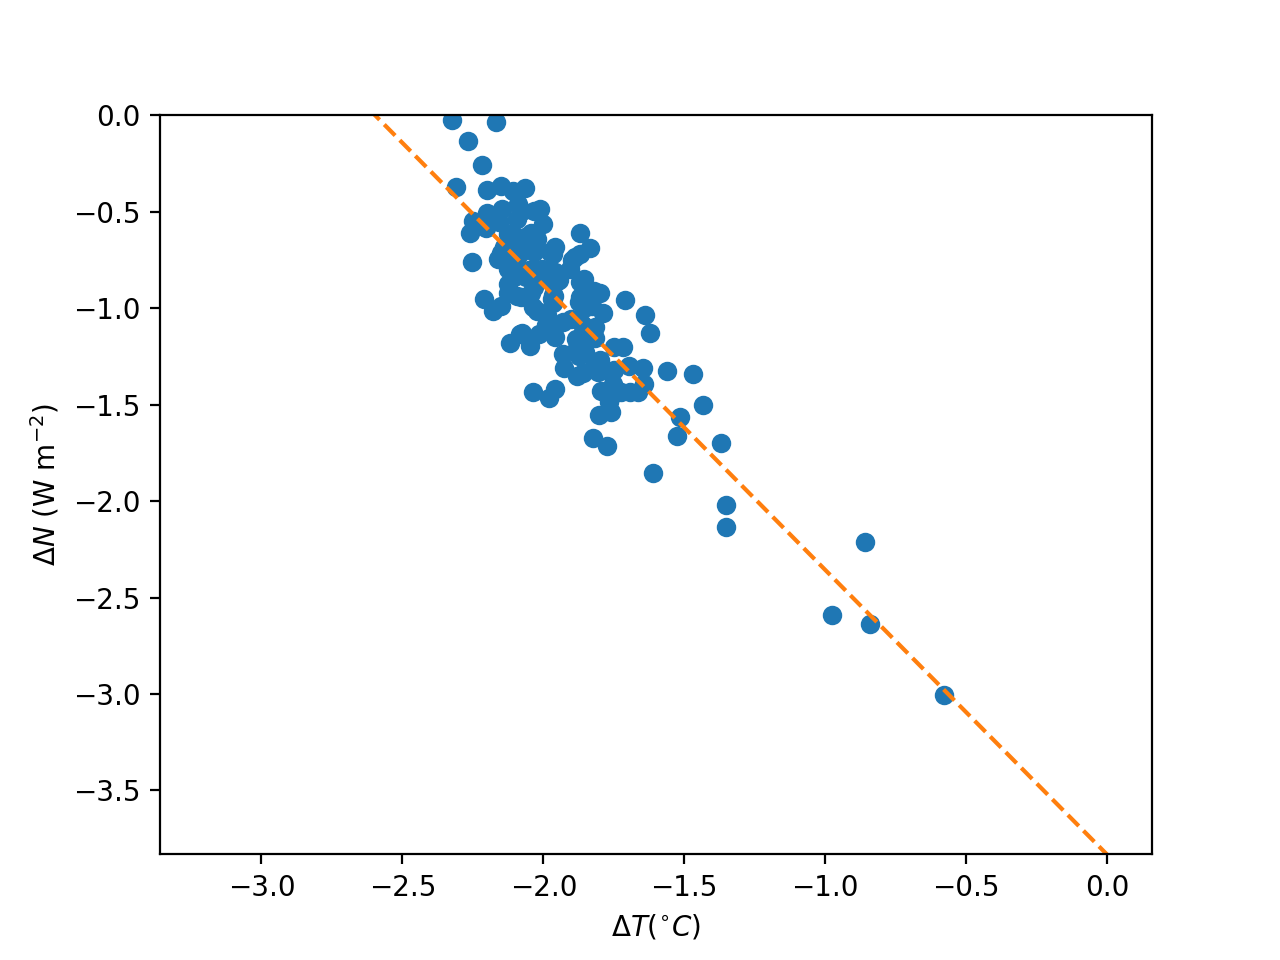

In [53]:
y=cdutil.YEAR(TOA0p5)-MV.average(TOApiC)
x=cdutil.YEAR(T0p5)-MV.average(TpiC)


plt.figure()
plt.plot(x.asma(),y.asma(),"o")
p=np.polyfit(x,y,1)
xn=np.arange(-3.2,0.1,.1)
plt.plot(xn,np.polyval(p,xn),ls="--")
xlab=plt.xlabel(r'$\Delta T (^{\circ}C)$')
ylab=plt.ylabel(r'$\Delta N$ (W m$^{-2})$')
np.polyval(p,0.)
#plt.xlim(-3.2,0)
plt.ylim(p[1],0)
plt.savefig("/Users/kmarvel/Desktop/A0p5CO2.png")
lam,Fcing=p
ECS0p5=Fcing/-lam

<IPython.core.display.Javascript object>


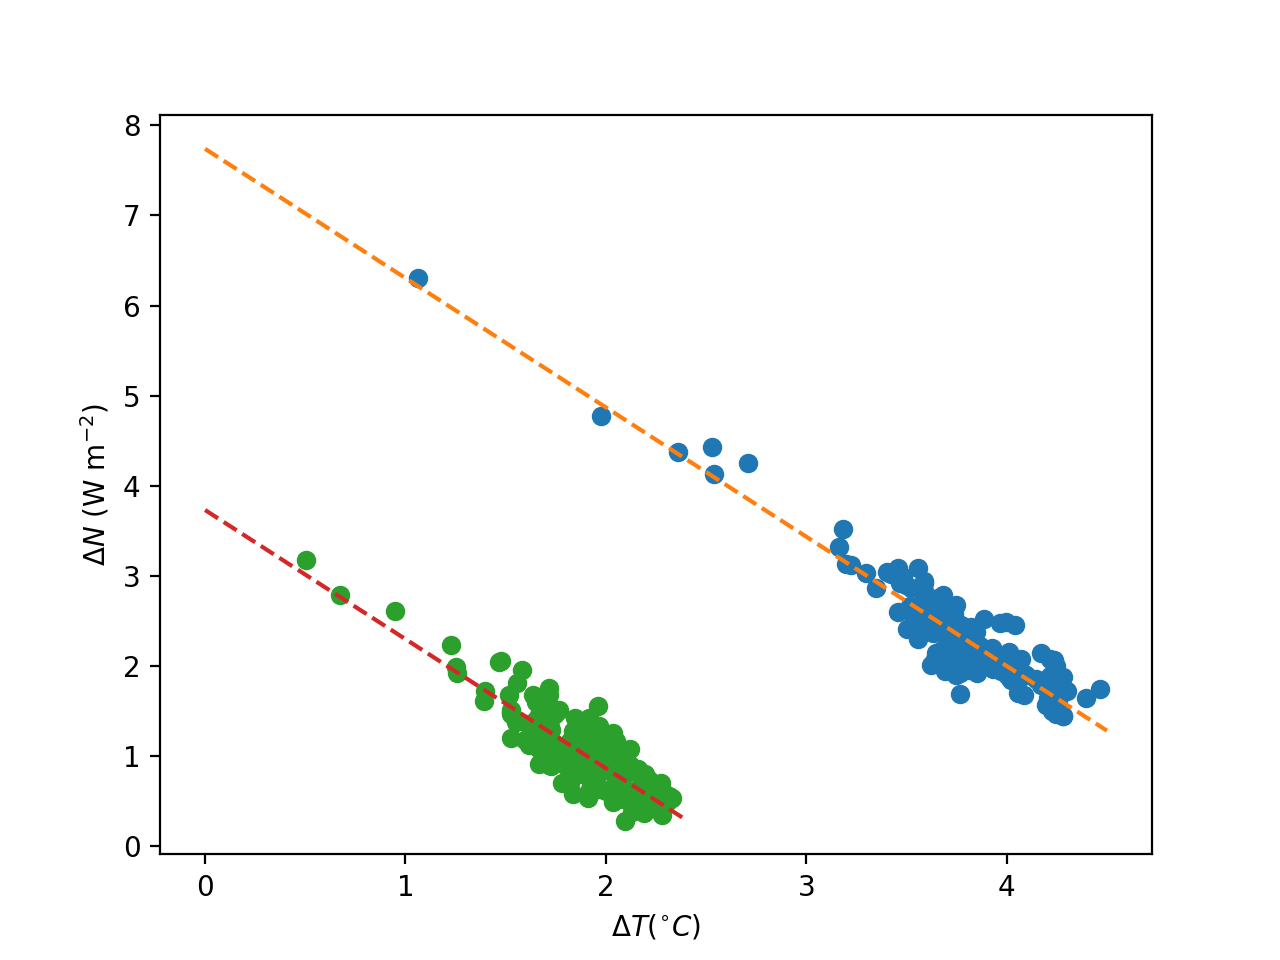

In [57]:
TOA4=rsdt4-(rsut4+rlut4)
y4=cdutil.YEAR(TOA4)-MV.average(TOApiC)
x4=cdutil.YEAR(T04)-MV.average(TpiC)


plt.figure()
plt.plot(x4.asma(),y4.asma(),"o")
p4=np.polyfit(x4,y4,1)
xn=np.arange(0,np.max(x4)+.1,.1)
plt.plot(xn,np.polyval(p4,xn),ls="--")
xlab=plt.xlabel(r'$\Delta T (^{\circ}C)$')
ylab=plt.ylabel(r'$\Delta N$ (W m$^{-2})$')


lam4,Fcing4=p4
ECS4=Fcing4/-lam4

y2=cdutil.YEAR(TOA2)-MV.average(TOApiC)
x2=cdutil.YEAR(T02)-MV.average(TpiC)


plt.plot(x2.asma(),y2.asma(),"o")
p2=np.polyfit(x2,y2,1)
xn=np.arange(0,np.max(x2)+.1,.1)
plt.plot(xn,np.polyval(p2,xn),ls="--")
xlab=plt.xlabel(r'$\Delta T (^{\circ}C)$')
ylab=plt.ylabel(r'$\Delta N$ (W m$^{-2})$')


lam2,Fcing2=p2
ECS2=Fcing2/-lam2

In [59]:
print("4xCO2 ECS ",ECS4/2.)
print("4xCO2 inferred 2xCO2 forcing",Fcing4/2)
print("2xCO2 ECS ",ECS2)
print("2xCO2 inferred 2xCO2 forcing",Fcing2)
print("0.5xCO2 ECS ",ECS0p5)
print("0xCO2 inferred 2xCO2 forcing",Fcing)

4xCO2 ECS  2.6970053260544655
4xCO2 inferred 2xCO2 forcing 3.8694026767293956
2xCO2 ECS  2.604344893932294
2xCO2 inferred 2xCO2 forcing 3.7310037492819683
0.5xCO2 ECS  -2.5969930961351486
0xCO2 inferred 2xCO2 forcing -3.8313186257979965


<IPython.core.display.Javascript object>


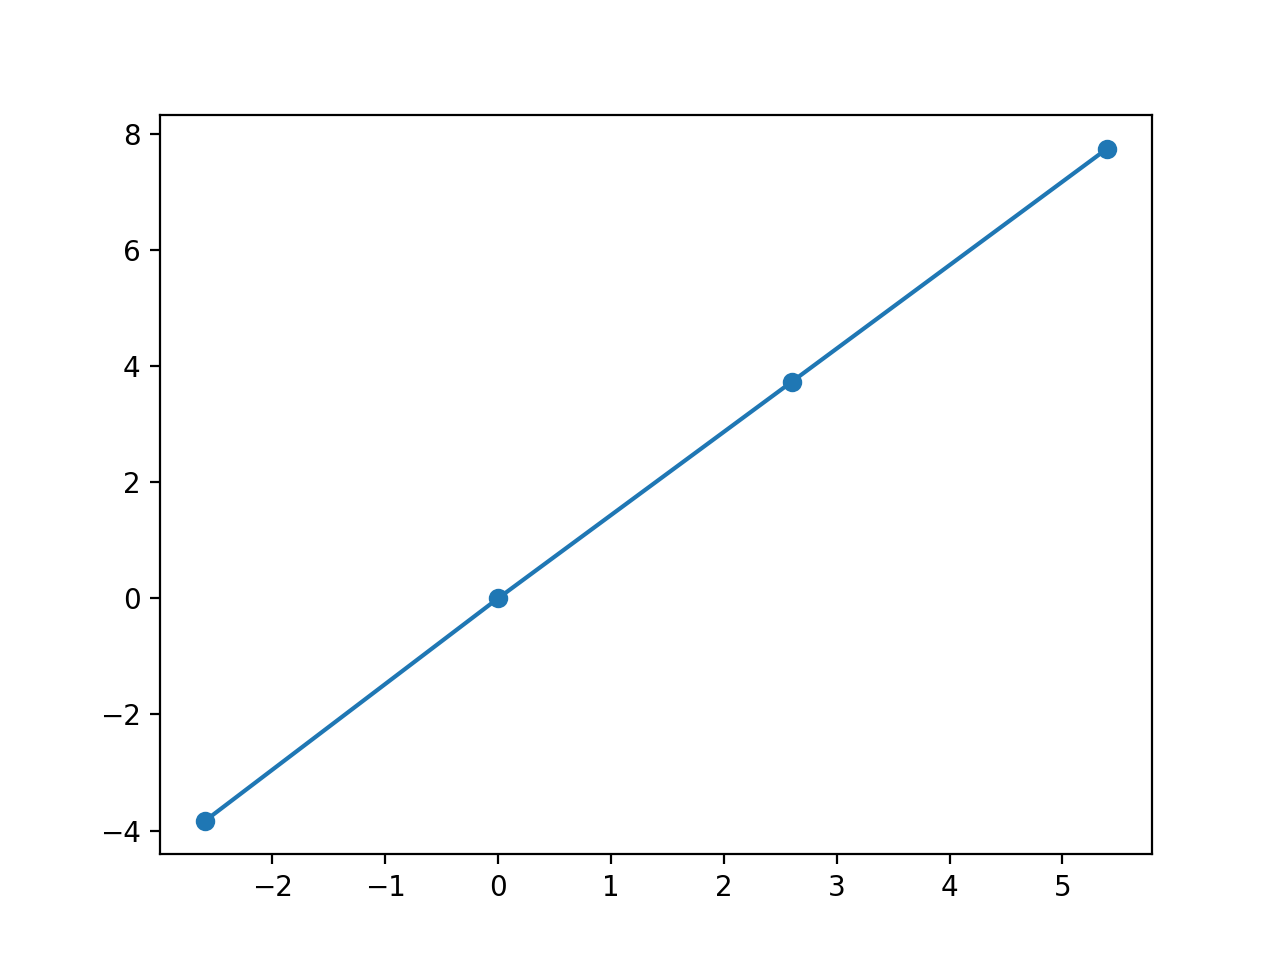

array([-0.00353697,  1.45625167, -0.01912465])

In [63]:
parax=[ECS0p5,0,ECS2,ECS4]
paray=[Fcing,0,Fcing2,Fcing4]
plt.figure()
plt.plot(parax,paray,"o-")
pstate=np.polyfit(parax,paray,2)
pstate

In [29]:
Fcing

-4.455064341382141

In [ ]:
sorted(fLGM.variables)

In [ ]:
fLGM['lwcrf_toa'].attributes

In [ ]:
plot_delta("lwcrf_toa",vmin=-20,vmax=20)

In [ ]:
plot_delta("swcrf_toa",vmin=-50,vmax=50,mask_land_ice=True)

In [ ]:
cdutil.averager(deltafixedSST("swcrf_toa"),axis='xy')

In [ ]:
cdutil.averager(deltafixedSST("lwcrf_toa"),axis='xy')

In [ ]:
landicechange=deltafixedSST("landicefr")
#np.where(landicechange>99)
cdutil.averager(MV.masked_where(landicechange>99,deltafixedSST("swcrf_toa")),axis='xy')

In [ ]:
f.variables

In [ ]:
datadirec+